In [1]:
import pandas as pd
import DataLoading
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def list_executions_from_Starnet_results(folder, case): 
    filenames = glob.glob(pathname="oT_Input*",root_dir=folder)
    executions = [fn.split(case)[1][1:-4] for fn in filenames]
    return executions

In [3]:
def list_investments_candidates_from_execs(executions): 
    l = [execution.strip("12345").strip("_cac") for execution in executions if execution != "Network_Existing_Generation_Full"]
    
#     return list(set(l))
    return np.unique(l)

In [30]:
# folder_read = "../10.StarNet/RTS24/ClusterResults/Results_PF/"
case = "RTS24"
folder_write = "../Data/RTS24_AC_12w_ext_o_dummy"
per = "2030"
sc = "sc01"

# executions = list_executions_from_Starnet_results(folder_read,case)
executions = DataLoading.list_executions(folder=folder_write,sc=sc,per=per)
# ics = list_investments_candidates_from_execs(executions)



df_LCOE = pd.read_csv(f"../Data/LCOE/LCOE.csv",delimiter=";")
mapping_dict = df_LCOE.set_index('Tech')['LCOE'].to_dict()

for exe in executions:

    df_generation = pd.read_csv(f"../Data/{folder_write}/output_f_{sc}_{exe}_{per}_PowerOutput.csv")
    #df_OC = pd.read_csv(f"../Data/{folder_write}/output_f_{sc}_{exe}_{per}_SystemCosts.csv")
    cost_df = pd.DataFrame()
    for tech_name, LCOE in mapping_dict.items():
        matching_columns = df_generation.columns[df_generation.columns.str.split("_").str[1]==(tech_name)]
        cost_df[matching_columns] = df_generation[matching_columns].mul(LCOE)
    cost_df.sum(axis=1).to_csv(f"{folder_write}/output_f_{sc}_{exe}_{per}_LCOE.csv",sep = ";")

['Network_Existing_Generation_Full', 'Network_Line_In_N_120_N_123_cac1']

,107_CC_1,118_CC_1,101_CT_1,101_CT_2,102_CT_1,102_CT_2,113_CT_1,113_CT_2,113_CT_3,113_CT_4,...,101_STEAM_4,102_STEAM_3,102_STEAM_4,115_STEAM_1,115_STEAM_2,115_STEAM_3,116_STEAM_1,123_STEAM_2,123_STEAM_3,122_WIND_1
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.979084
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.357486
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.947357
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.343476
4,0.543294,2.121344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.325165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,8.972569,0.604626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.636400
2180,7.650817,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.497400
2181,2.800723,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.737000
2182,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227800


In [46]:
mapping_dict

{'CC': 72,
 'CT': 112,
 'HYDRO': 114,
 'NUCLEAR': 45,
 'PV': 90,
 'RTPV': 129,
 'STEAM': 105,
 'WIND': 67}

In [49]:
cost_df = pd.DataFrame()
for tech_name, LCOE in mapping_dict.items():
    matching_columns = df_generation.columns[df_generation.columns.str.split("_").str[1]==(tech_name)]
    cost_df[matching_columns] = df_generation[matching_columns].mul(LCOE)

<Axes: title={'center': 'OC'}>

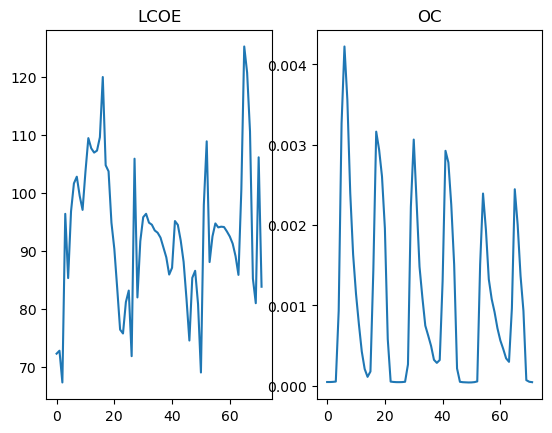

In [72]:
fig, axs = plt.subplots(1,2)
s=0
e=72
cost_df.sum(axis=1)[s:e].plot(ax=axs[0],title = "LCOE")
df_OC.drop("LoadLevel",axis = 1)[s:e].sum(axis=1).plot(ax=axs[1],title = "OC")

In [29]:
pd.read_csv(f"../Data/{folder_write}/output_f_{sc}_{exe}_{per}_PowerOutput.csv").columns.str.split("_").str[1].unique().sort_values()

Index(['CC', 'CT', 'HYDRO', 'NUCLEAR', 'PV', 'RTPV', 'STEAM', 'WIND', nan], dtype='object')

In [19]:
pd.read_csv(f"../Data/{folder_write}/output_f_{sc}_{exe}_{per}_SystemCosts.csv")

,LoadLevel,vTotalCCost,vTotalECost,vTotalGCost,vTotalRCost
0,01-01 00:00:00+01:00,0.0,0.000000,0.000047,0.0
1,01-01 01:00:00+01:00,0.0,0.000000,0.000047,0.0
2,01-01 02:00:00+01:00,0.0,0.000000,0.000049,0.0
3,01-01 03:00:00+01:00,0.0,0.000000,0.000053,0.0
4,01-01 04:00:00+01:00,0.0,0.000486,0.000447,0.0
...,...,...,...,...,...
2179,12-09 19:00:00+01:00,0.0,0.001746,0.001455,0.0
2180,12-09 20:00:00+01:00,0.0,0.001395,0.001174,0.0
2181,12-09 21:00:00+01:00,0.0,0.000511,0.000466,0.0
2182,12-09 22:00:00+01:00,0.0,0.000000,0.000053,0.0


In [7]:
outp = pd.read_csv(f"../Data/RTS24_AC_fy_ext_o_dummy/")


NameError: name 'exe' is not defined